### Лаборатоная работа №2. Вячеслав Денисов.
#### Мономы. Метод итераций по подоблостям. N = 4.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cheb_monome(c, x):
    return sum([c[i] * (x ** i) for i in range(len(c))])

In [3]:
def w_ex(x):
    return x ** 2 * (1 - x) ** 2 * np.exp(x)

In [4]:
def f(x):
    return np.exp(x) * (32 * x + 49 * x ** 2 + 14 * x ** 3 + x ** 4 - 12)

In [5]:
def ea(y_by_wex, y):
    return max([np.abs(y_by_wex[i] - y[i])
                for i in range(len(y))])

In [6]:
def er(y_by_wex, y):
    return ea(y_by_wex, y)/max(y_by_wex)

In [7]:
def mu(A):
    return np.linalg.cond(A)

In [8]:
def slau(K, c1, j):
    N = 4 
    h = 1 / 2 / K
    kc = pow(h, 4)
    b = np.zeros(N + 5)
    x_centers = [(i / K + (i + 1) / K) / 2 for i in range(K)]
    local_points = np.linspace(-1, 1, N + 3)[1:N + 2]
    
    # Первая матрица
    if j == 0:
        A = [[0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [1,2,3,4,5], [0,0,2,12,36], [1,-1,1,-1,1], [0,1,-2,3,-4]]
        for i in range(0,5):
            b[i] = kc * f(local_points[i] * h + x_centers[j])
        b[5] = c1[0][1] - c1[2][1] + 2 * c1[3][1] - 3 * c1[4][1]
        b[6] = 2 * c1[2][1] - 12 * c1[4][1]
        b[7] = 0
        b[8] = 0
    # Центральные матрицы
    if j in range (1,K-1):
        A = [[0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [1,-2,3,-4,5], [0,0,2,-12,36], [1,2,3,4,5], [0,0,2,12,36]]
        for i in range(0,5):
            b[i] = kc * f(local_points[i] * h + x_centers[j])
        b[5] = c1[0][j - 1] - c1[2][j - 1] - 2 * c1[3][j - 1] - 3 * c1[4][j - 1]
        b[6] = 2 * c1[2][j - 1] - 12 * c1[4][j - 1]
        b[7] = c1[0][j + 1] - c1[2][j + 1] + 2 * c1[3][j + 1] - 3 * c1[4][j + 1]
        b[8] = 2 * c1[2][j + 1] - 12 * c1[4][j + 1]
    # Последняя матрицы
    if j == K-1:
        A = [[0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [0,0,0,0,24], [1,-2,3,-4,5], [0,0,2,-12,36], [1,1,1,1,1], [0,1,2,3,4]]
        for i in range(0,5):
            b[i] = kc * f(local_points[i] * h + x_centers[j])
        b[5] = c1[0][K - 2] - c1[2][K - 2] - 2 * c1[3][K - 2] - 3 * c1[4][K - 2]
        b[6] = 2 * c1[2][K - 2] - 12 * c1[4][K - 2]
        b[7] = 0
        b[8] = 0
    
    return A, b

In [9]:
def max1(c1,c2,K):
    N = 4
    m = np.abs(c2[0][0] - c1[0][0])
    for i in range (0, N + 1):
        for j in range (0, K):
            if (np.abs(c2[i][j] - c1[i][j]) > m):
                m = np.abs(c2[i][j] - c1[i][j])
    return m

In [10]:
def Iter(K):
    N = 4
    M = N + 1
    Niter = 0
    eps = pow(10, -12)
    c2 = np.zeros((M, K))
    for i in range (0, M):
        for j in range (0, K):
            c2[i][j] = 0.4
    c1 = np.zeros((M, K))
    c3 = np.zeros((M, K))
    while (max1(c1,c2,K) >= eps):
        Niter = Niter + 1
        # присваиваем старому решению новое
        c1 = np.copy(c2)
        # для каждой ячейки
        for j in range (0, K):
            c3 = c2
            #формируем СЛАУ
            b = np.zeros(N + 5)
            A = np.zeros((N + 5, N + 1))
            A, b = slau (K, c3, j)
            #решаем её
            c = np.zeros(M)
            Q, R = np.linalg.qr(A)
            c = np.linalg.solve(R, np.dot(Q.transpose(), b)) # Решение системы
            for i in range (0, M):
                c2[i][j] = c[i]

    return c1, c2, Niter

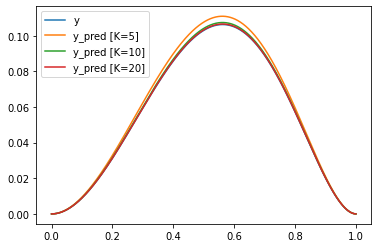

K	Ea	Ea_order	Er	Er_order	Niter	mu(Ab)	mu(Ai)

5	0.004675355431703429	2.887517741641926	0.04398658862200763	2.887517741641926	73	69.76538572706919	121.05375486430484

10	0.001134102211929569	2.043525376036038	0.01066983851392012	2.043525376036038	245	69.76538572706919	121.05375486430484

20	0.0002808607863593604	2.0136235549744486	0.002642389022633438	2.0136235549744486	937	69.76538572706919	121.05375486430484



In [11]:
points_number = 1000
logs = [] # Таблица результатов
X = [i * 0.001 for i in range(points_number)]
# График точного решения
y_by_wex = [w_ex(x) for x in X]
plt.plot(X, y_by_wex, label='y')
N = 4
M = N + 1
for K in [2, 5, 10, 20]:
    h = 0.5/K
    x_centers = [(i / K + (i + 1) / K) / 2 for i in range(K)]
    c = np.zeros(M * K)
    c1 = np.zeros((M, K))
    c2 = np.zeros((M, K))
    c1, c2, Niter = Iter(K)
    for i in range (0, M * K):
        c[i] = c2[i % (N + 1)][i // (N + 1)]

    y = np.zeros(len(X))
    for i in range(len(X)):
        interval = i // (points_number // K + 1)
        y[i] = cheb_monome(c[interval * (5):((interval + 1) * (5))],  # коэф-ты c для интервала
                           (X[i] - x_centers[interval]) / h)  # x относительно центра интервала
    
    Ab = np.zeros((N + 5, N + 1))
    b1 = np.zeros(N + 5)
    Ab, b1 = slau(K, c1, 0)
    
    Ai = np.zeros((N + 5, N + 1))
    b2 = np.zeros(N + 5)
    Ai, b2 = slau(K, c1, 1)

    curr_ea = ea(y_by_wex, y)
    curr_er = er(y_by_wex, y)
    if (K != 2):
        plt.plot(X, y, label=f'y_pred [K={str(K)}]')
        logs.append(f"{K}\t"
                    f"{curr_ea}\t"
                    f"{np.log2(prev_ea/curr_ea)}\t"
                    f"{curr_er}\t"
                    f"{np.log2(prev_er/curr_er)}\t"
                    f"{Niter}\t"
                    f"{mu(Ab)}\t"
                    f"{mu(Ai)}\n")
    prev_ea = curr_ea
    prev_er = curr_er
plt.legend()
plt.show()
for line in ['K\tEa\tEa_order\tEr\tEr_order\tNiter\tmu(Ab)\tmu(Ai)\n'] + logs: 
    print(line)